<a href="https://colab.research.google.com/github/Perniciosius/Star-Type-Classification/blob/master/star_type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import CSV

In [1]:
from google.colab import files
files.upload()

Saving Stars.csv to Stars.csv


{'Stars.csv': b'Temperature,L,R,A_M,Color,Spectral_Class,Type\r\n3068,0.0024,0.17,16.12,Red,M,0\r\n3042,0.0005,0.1542,16.6,Red,M,0\r\n2600,0.0003,0.102,18.7,Red,M,0\r\n2800,0.0002,0.16,16.65,Red,M,0\r\n1939,0.000138,0.103,20.06,Red,M,0\r\n2840,0.00065,0.11,16.98,Red,M,0\r\n2637,0.00073,0.127,17.22,Red,M,0\r\n2600,0.0004,0.096,17.4,Red,M,0\r\n2650,0.00069,0.11,17.45,Red,M,0\r\n2700,0.00018,0.13,16.05,Red,M,0\r\n3600,0.0029,0.51,10.69,Red,M,1\r\n3129,0.0122,0.3761,11.79,Red,M,1\r\n3134,0.0004,0.196,13.21,Red,M,1\r\n3628,0.0055,0.393,10.48,Red,M,1\r\n2650,0.0006,0.14,11.782,Red,M,1\r\n3340,0.0038,0.24,13.07,Red,M,1\r\n2799,0.0018,0.16,14.79,Red,M,1\r\n3692,0.00367,0.47,10.8,Red,M,1\r\n3192,0.00362,0.1967,13.53,Red,M,1\r\n3441,0.039,0.351,11.18,Red,M,1\r\n25000,0.056,0.0084,10.58,Blue White,B,2\r\n7740,0.00049,0.01234,14.02,White,A,2\r\n7220,0.00017,0.011,14.23,White,F,2\r\n8500,0.0005,0.01,14.5,White,A,2\r\n16500,0.013,0.014,11.89,Blue White,B,2\r\n12990,0.000085,0.00984,12.23,Yellowish W

# Import required libraries

In [43]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import seaborn as sns

# Load data from csv and rename columns

**Type:**

*   Red Dwarf - 0
*   Brown Dwarf - 1
*   White Dwarf - 2
*   Main Sequence - 3
*   Super Giants - 4
*   Hyper Giants - 5



In [44]:
df = pd.read_csv("Stars.csv")
df = df.rename(columns = {"L": "Relative_Luminosity", "R": "Relative_Radius",
                          "A_M": "Absolute_Magnitude"})
df.head()

,Temperature,Relative_Luminosity,Relative_Radius,Absolute_Magnitude,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [63]:
X = df.iloc[:, 0:4].values
y = df.iloc[:, 6]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                    random_state = 0)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
prediction = clf.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, prediction))
print("Classification report:\n", 
      metrics.classification_report(y_test, prediction))

Accuracy:  1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        11

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



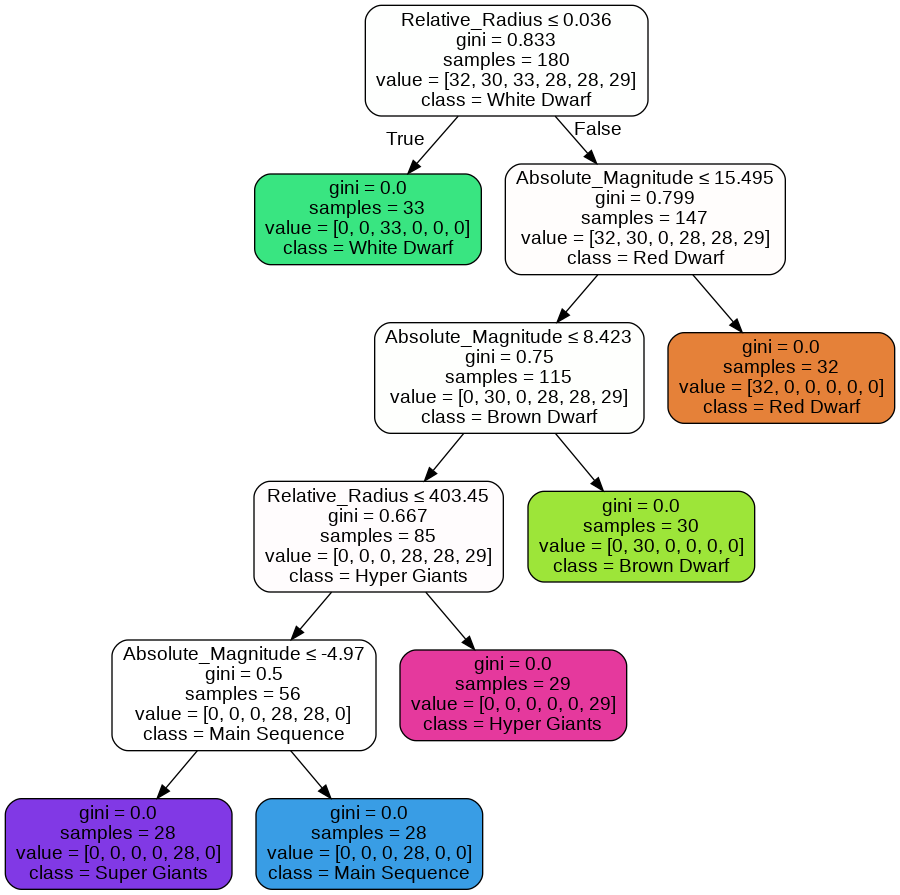

In [65]:
X_names = df.columns[0:4].values
class_names = ["Red Dwarf", "Brown Dwarf", "White Dwarf",
               "Main Sequence", "Super Giants", "Hyper Giants"]
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, class_names = class_names,
                filled = True, rounded = True, special_characters = True, 
                feature_names = X_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("stars_gini.png")
Image(graph.create_png())

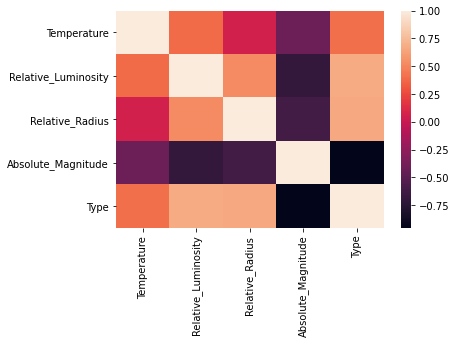

In [66]:
sns.heatmap(df.corr())

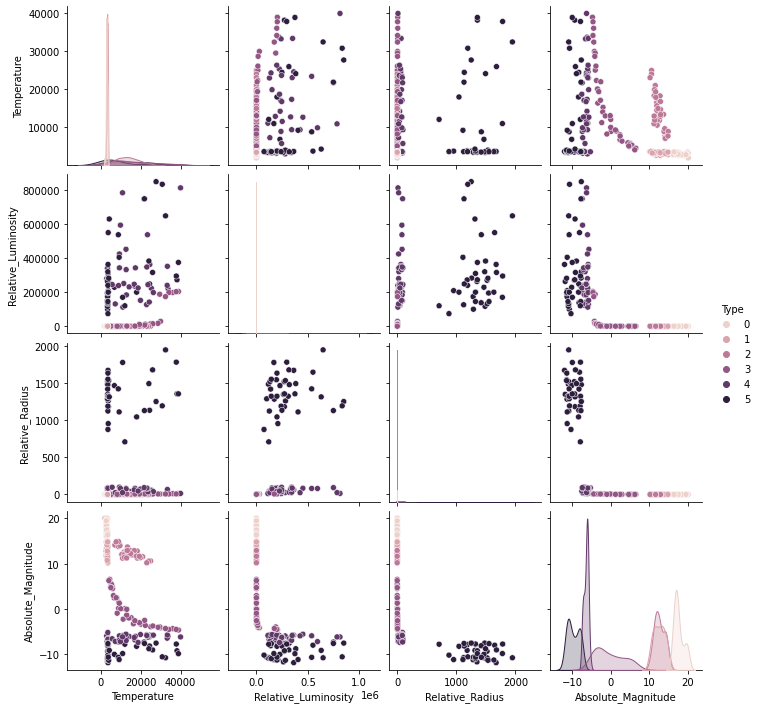

In [67]:
sns.pairplot(data = df, hue = "Type")

Accuracy:  0.9833333333333333
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00         7
           3       1.00      0.92      0.96        12
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        11

    accuracy                           0.98        60
   macro avg       0.98      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60



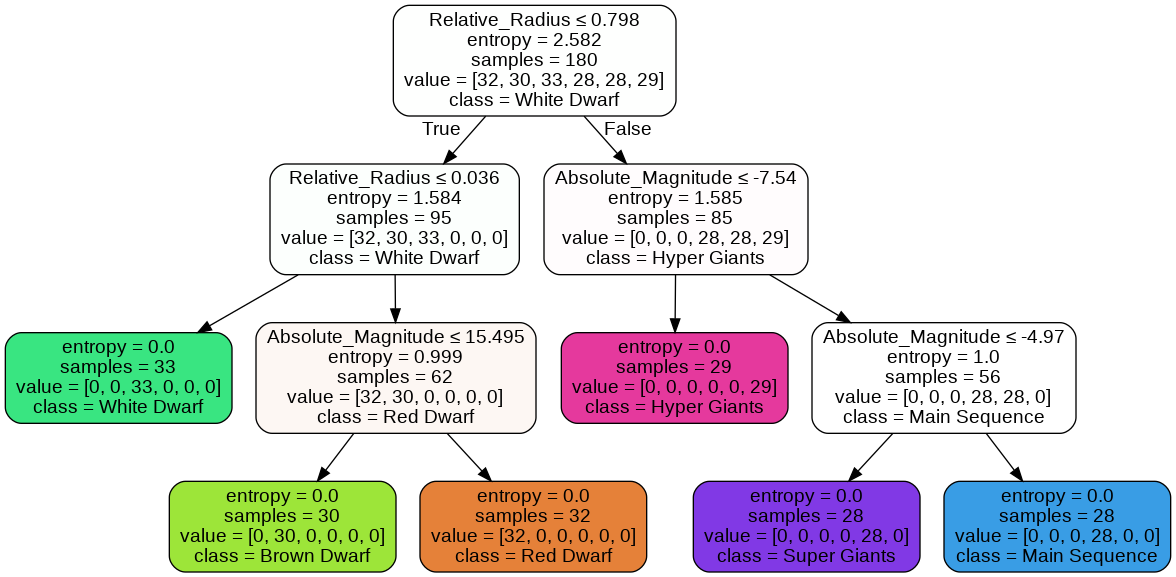

In [68]:
clf = DecisionTreeClassifier(criterion = "entropy", min_samples_split = 50)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, prediction))
print("Classification report:\n",
      metrics.classification_report(y_test, prediction))
X_names = df.columns[0:4].values
class_names = ["Red Dwarf", "Brown Dwarf", "White Dwarf",
               "Main Sequence", "Super Giants", "Hyper Giants"]
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, class_names = class_names,
                filled = True, rounded = True, special_characters = True,
                feature_names = X_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("stars_entropy.png")
Image(graph.create_png())